### This notebook contains model testing. Only included for completeness. All important rational and decisions are documented in final_model notebook

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('cleaned_starcraft_data.csv')

In [58]:
df.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,4,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,4,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,3,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,2,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,2,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [59]:
X = df.drop(columns = ['LeagueIndex'])
y = df['LeagueIndex']

In [60]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

In [61]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)

X_train_lda=lda.fit_transform(X_train_scale, y_train)
X_test_lda=lda.transform(X_test_scale)

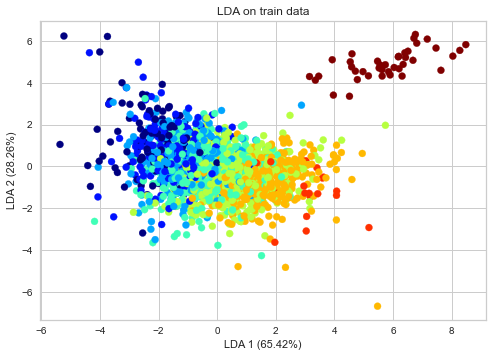

Variance explained by the first two components: 93.68%


In [62]:
import matplotlib.pyplot as plt

variance_ratio = sum(lda.explained_variance_ratio_)

N=10
cmap= plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# Plot the 2D solution
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap=cmap)
plt.xlabel('LDA 1 ({}%)'.format(round(lda.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('LDA 2 ({}%)'.format(round(lda.explained_variance_ratio_[1]*100, 2)))
plt.title('LDA on train data')
plt.show()

print('Variance explained by the first two components: {}%'.format(round(variance_ratio*100, 2)))

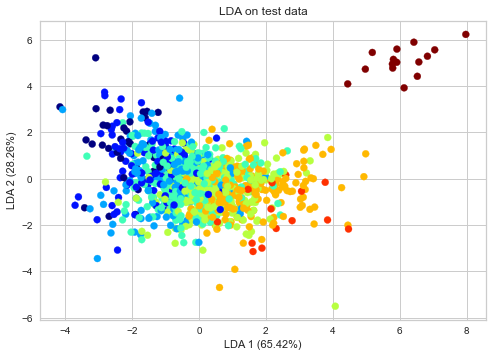

Variance explained by the first two components: 93.68%


In [63]:
import matplotlib.pyplot as plt

variance_ratio = sum(lda.explained_variance_ratio_)

N=10
cmap= plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# Plot the 2D solution
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap=cmap)
plt.xlabel('LDA 1 ({}%)'.format(round(lda.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('LDA 2 ({}%)'.format(round(lda.explained_variance_ratio_[1]*100, 2)))
plt.title('LDA on test data')
plt.show()

print('Variance explained by the first two components: {}%'.format(round(variance_ratio*100, 2)))

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.409
Config: {'shrinkage': 0.0}


In [65]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train_pca=pca.fit_transform(X_train_scale, y_train)
X_test_pca=pca.transform(X_test_scale)
print("Number of eigenvalues greater than 1:", len(pca.explained_variance_[pca.explained_variance_ > 1]))



Number of eigenvalues greater than 1: 2


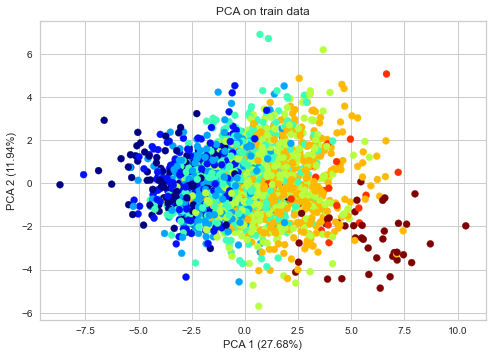

Variance explained by the first two components: 39.62%


In [66]:
import matplotlib.pyplot as plt

variance_ratio = sum(pca.explained_variance_ratio_)

N=10
cmap= plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# Plot the 2D solution
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap)
plt.xlabel('PCA 1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PCA 2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('PCA on train data')
plt.show()

print('Variance explained by the first two components: {}%'.format(round(variance_ratio*100, 2)))

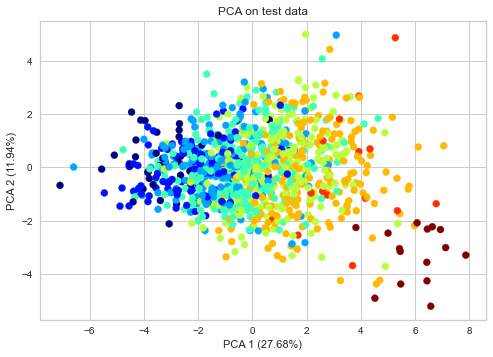

Variance explained by the first two components: 39.62%


In [67]:
import matplotlib.pyplot as plt

variance_ratio = sum(pca.explained_variance_ratio_)

N=10
cmap= plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# Plot the 2D solution
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap)
plt.xlabel('PCA 1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PCA 2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('PCA on test data')
plt.show()

print('Variance explained by the first two components: {}%'.format(round(variance_ratio*100, 2)))

In [68]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [69]:
y.value_counts()

3    811
4    805
5    621
2    553
1    347
0    167
7     55
6     35
Name: LeagueIndex, dtype: int64

In [70]:
y_train_smote.value_counts()

0    577
4    577
1    577
5    577
2    577
6    577
3    577
7    577
Name: LeagueIndex, dtype: int64

In [71]:
codes = {
    0: "Bronze",
    1: "Silver", 
    2: "Gold", 
    3: "Platinum", 
    4: "Diamond", 
    5: "Master",
    6: "GrandMaster", 
    7: "Professional leagues"
}

In [72]:
#MODEL TESTING

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt




In [73]:
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder=codes)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    

def plot_conf_matrix(model, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=codes.values())
  disp.plot()
  plt.show()

def calc_metrics(y_test, y_pred, y_pred_prob):
  print('auc', roc_auc_score(y_test, y_pred_prob, multi_class = 'ovo'))
  print('acc', accuracy_score(y_test, y_pred))
  print('f1', f1_score(y_test, y_pred, average='macro'))
  print('recall', recall_score(y_test, y_pred, average = 'macro'))
  print('precision', precision_score(y_test, y_pred, average = 'macro'))

def do_what_i_want(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  if type(model) == GridSearchCV:
    print('best_parameters', model.best_params_)
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)

  calc_metrics(y_test, y_pred, y_pred_prob)
  plot_conf_matrix(model, y_test, y_pred)
  plot_ROC_curve(model, X_train, y_train, X_test, y_test)


auc 0.8093279338179137
acc 0.366045142296369
f1 0.3684234513226523
recall 0.36748574344073964
precision 0.39118279381207943


/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


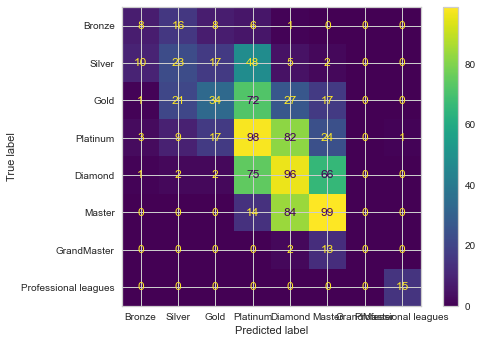

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


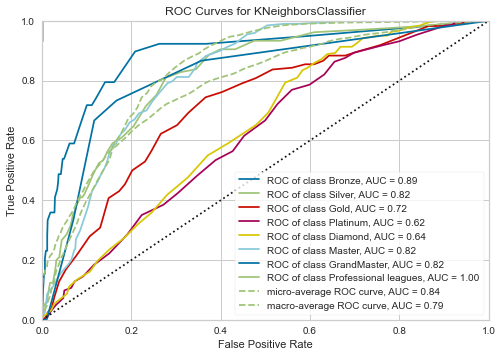

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
do_what_i_want(knn, X_train, X_test, y_train, y_test)

auc 0.8378007381408262
acc 0.27968596663395484
f1 0.34052684277623796
recall 0.42195619412621804
precision 0.332505757362889


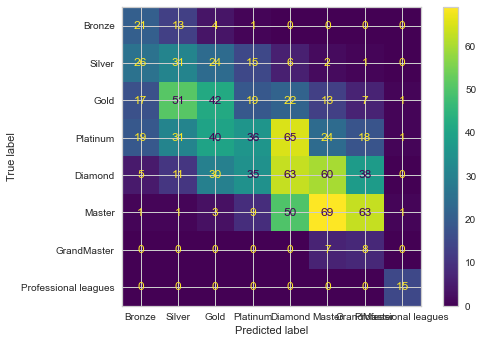

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


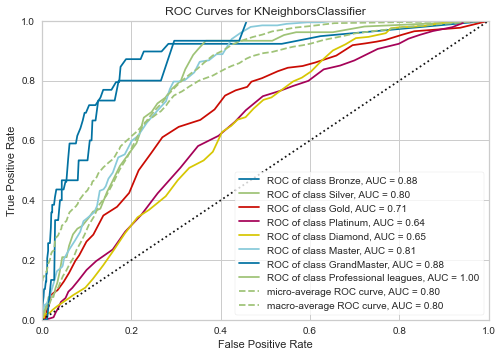

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
do_what_i_want(knn, X_train_smote, X_test, y_train_smote, y_test)

auc 0.8481347833380404
acc 0.3915603532875368
f1 0.3995431346160806
recall 0.39325292318686894
precision 0.43753089128167344


/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


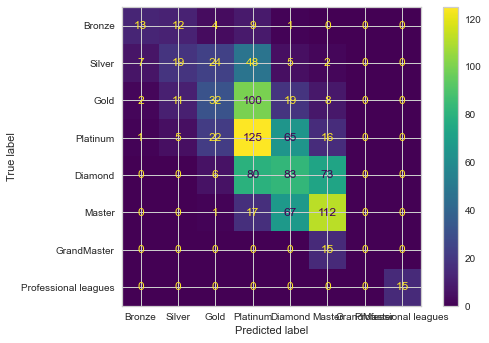

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


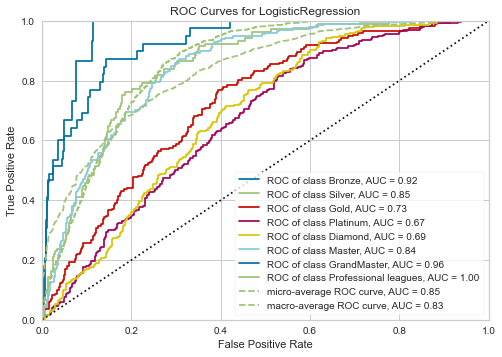

In [76]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
do_what_i_want(lm, X_train, X_test, y_train, y_test)

auc 0.8587817068713449
acc 0.3228655544651619
f1 0.38523919052786293
recall 0.4935549840525775
precision 0.3753316310137772


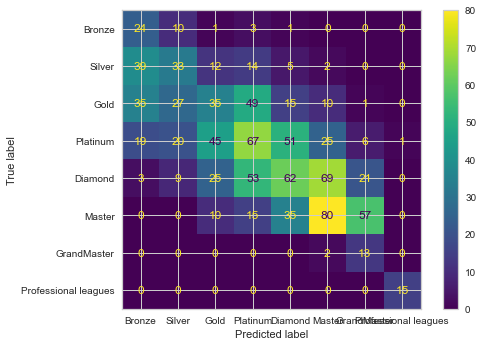

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


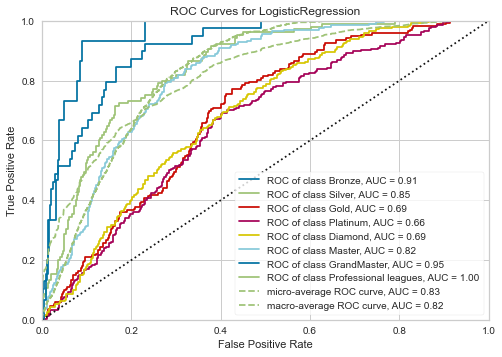

In [77]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
do_what_i_want(lm, X_train_smote, X_test, y_train_smote, y_test)

best_parameters {'penalty': 'l1'}
auc 0.8482583796812527
acc 0.39842983316977426
f1 0.40624657674567344
recall 0.3987549395576515
precision 0.44616600483311397


/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


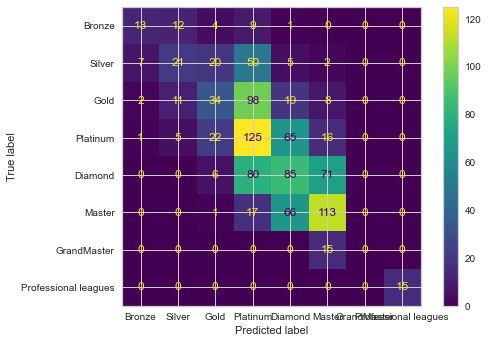

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


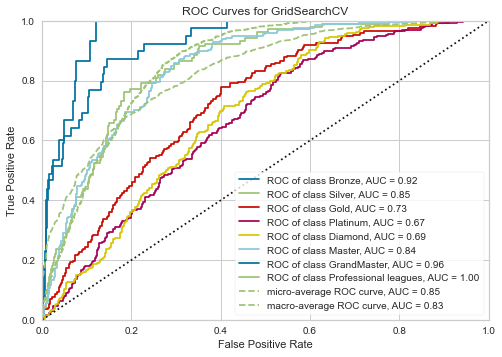

In [78]:
grid={ 
    "penalty":["l1","l2"]
    }
logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=5)

do_what_i_want(logreg_cv, X_train, X_test, y_train, y_test)

best_parameters {'penalty': 'l1'}
auc 0.858182953081803
acc 0.32188420019627084
f1 0.38976115590441684
recall 0.4960551384614499
precision 0.38260455890790757


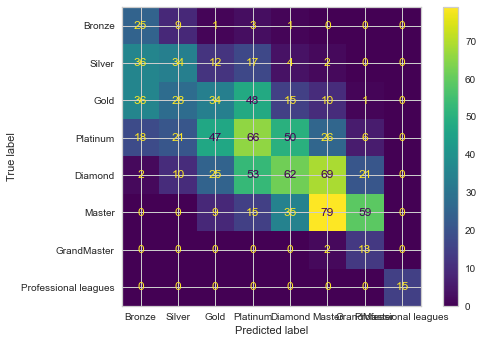

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


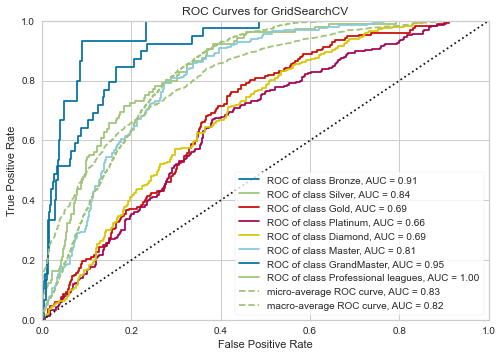

In [79]:
grid={ 
    "penalty":["l1","l2"]
    }
logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=5)

do_what_i_want(logreg_cv, X_train_smote, X_test, y_train_smote, y_test)

auc 0.859940649586642
acc 0.42885181550539747
f1 0.4386595224635781
recall 0.4354851195221013
precision 0.44429911693397817


/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


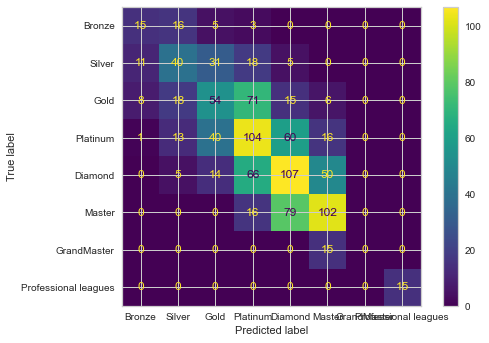

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


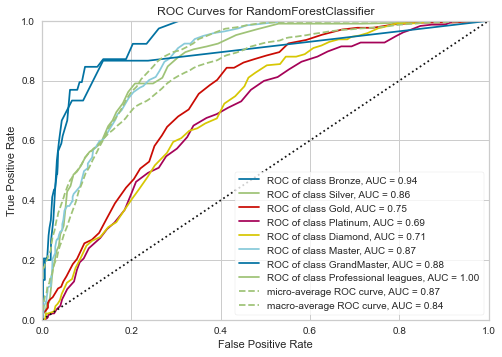

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
do_what_i_want(model, X_train, X_test, y_train, y_test)

auc 0.8626188349225771
acc 0.3974484789008832
f1 0.4448675275435806
recall 0.4630762902234554
precision 0.44336326686065264


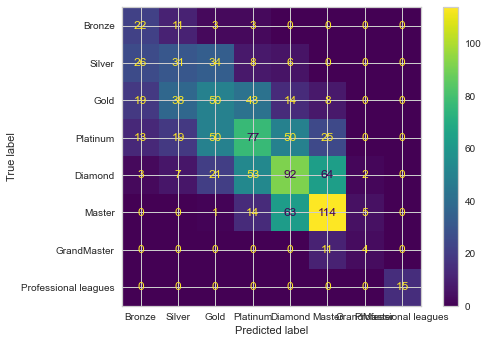

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


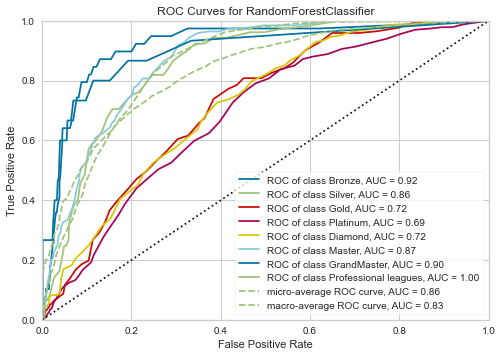

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
do_what_i_want(model, X_train_smote, X_test, y_train_smote, y_test)

In [82]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

best_parameters {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}
auc 0.8670627212445068
acc 0.4072620215897939
f1 0.4174330065755283
recall 0.41655735609371547
precision 0.42172422967350587


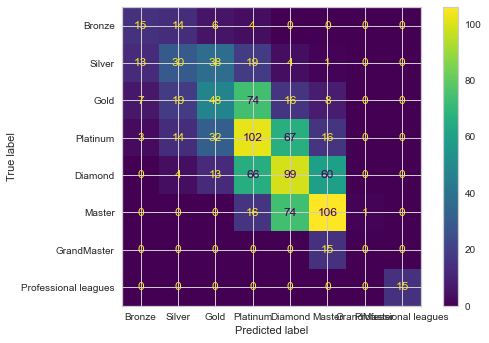

/Users/Rahul/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


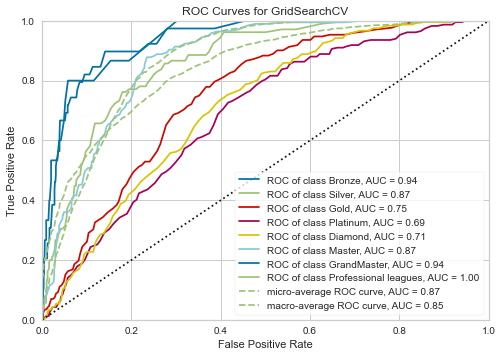

In [83]:
rf = RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid)
do_what_i_want(rf_cv, X_train, X_test, y_train, y_test)


In [ ]:
rf = RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid)
do_what_i_want(rf_cv, X_train_smote, X_test, y_train_smote, y_test)


In [ ]:
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

In [ ]:
rf = RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid)
do_what_i_want(rf_cv, X_train_smote, X_test, y_train_smote, y_test)

auc 0.8367685534755859
acc 0.39548577036310106
f1 0.395451778996614
recall 0.39356638669134125
precision 0.4035478009305524


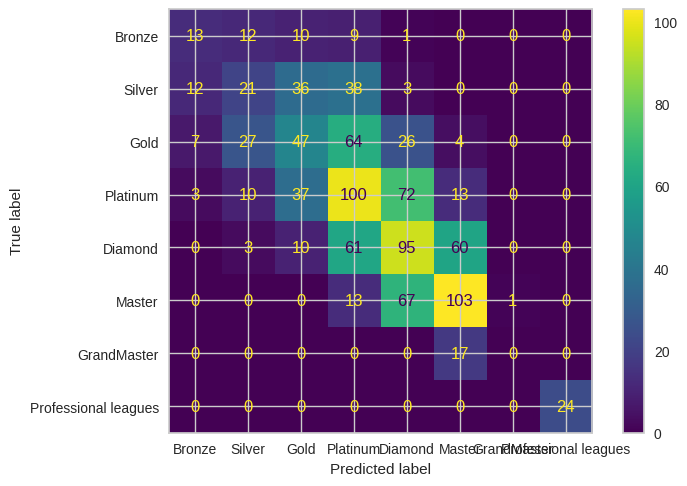

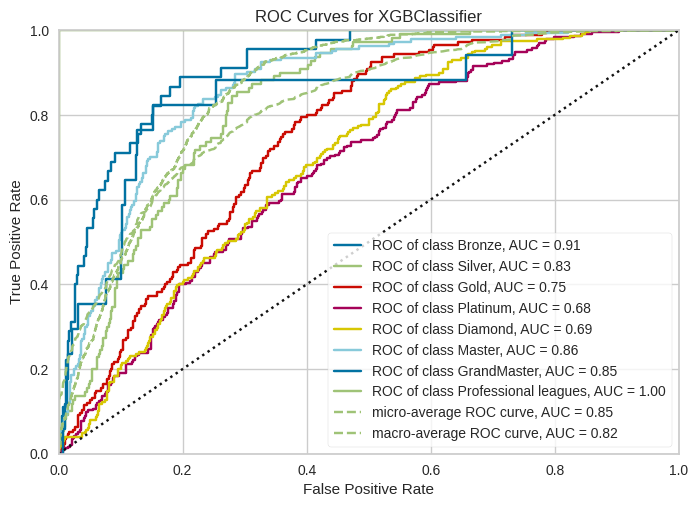

In [45]:
from xgboost import XGBClassifier
model = XGBClassifier()
do_what_i_want(model, X_train, X_test, y_train, y_test)

auc 0.854114903366286
acc 0.4043179587831207
f1 0.41028124203951244
recall 0.405081180962747
precision 0.4300602849028539


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


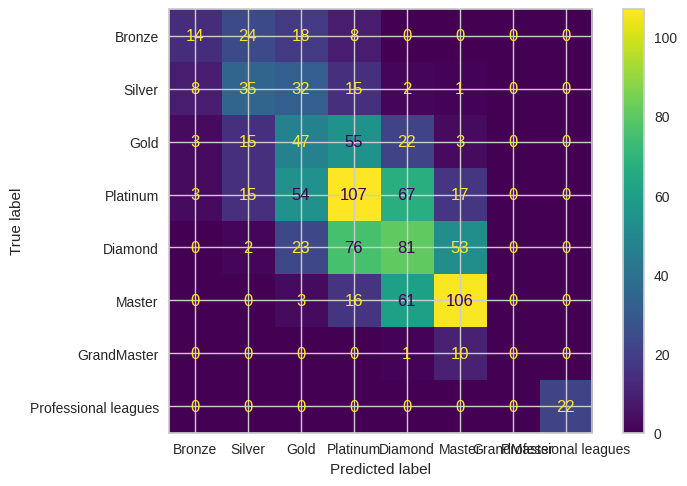

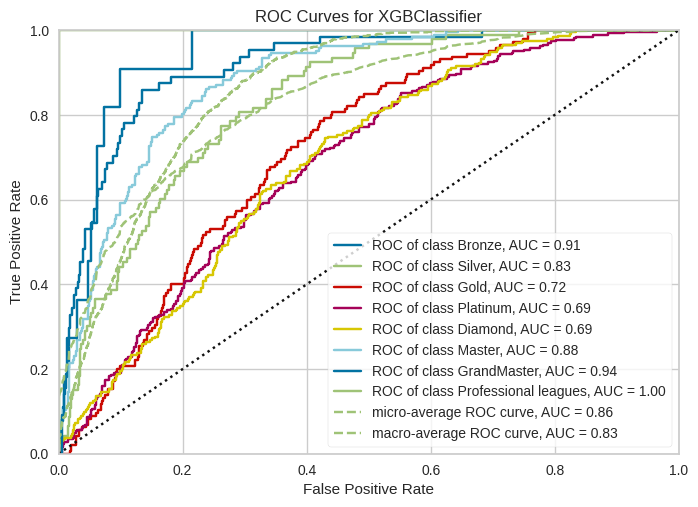

In [74]:
from xgboost import XGBClassifier
model = XGBClassifier()
do_what_i_want(model, X_train, X_test, y_train, y_test)

auc 0.8519704206575442
acc 0.38665358194308147
f1 0.41926261414797195
recall 0.41947931819470796
precision 0.4218173098366166


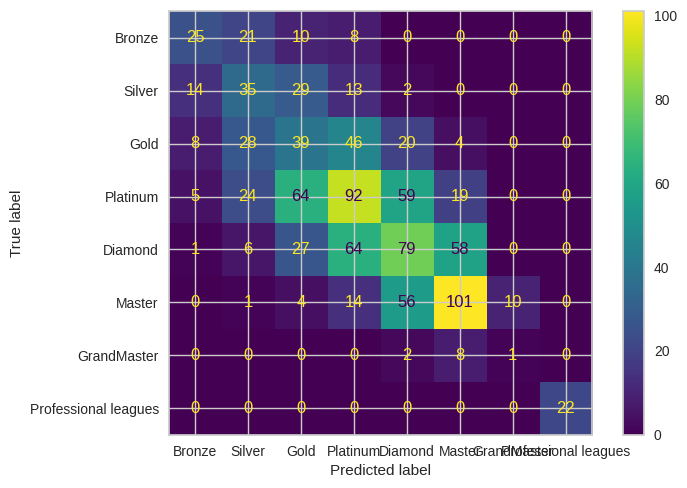

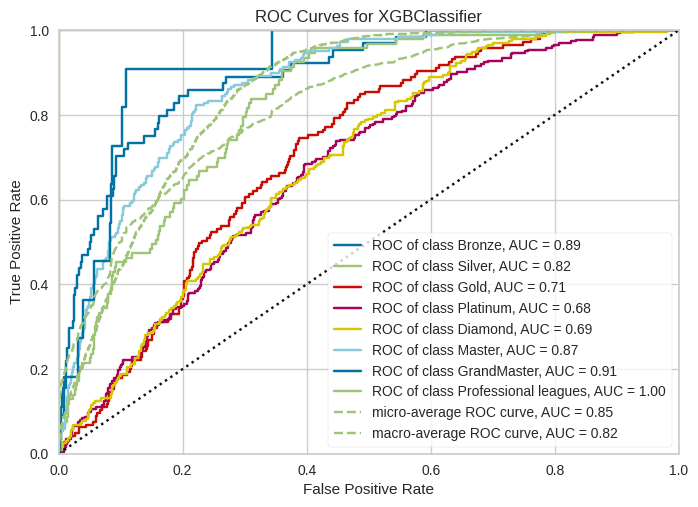

In [75]:
from xgboost import XGBClassifier
model = XGBClassifier()
do_what_i_want(model, X_train_smote, X_test, y_train_smote, y_test)

In [16]:
import tensorflow as tf
from tensorflow import keras

In [79]:
X_train_nn, X_val, y_train_nn, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.2) 

In [80]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 10, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (X_train_nn.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(y_train)+1, activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               4864      
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                      

In [81]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(X_train_nn, y_train_nn,
                epochs = 100,
                verbose = 1, batch_size = 128,
                validation_data = (X_val, y_val),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/100
29/29 [==============================] - 3s 14ms/step - loss: 1.5955 - accuracy: 0.3651 - val_loss: 1.5416 - val_accuracy: 0.3443
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2927 - accuracy: 0.4433 - val_loss: 1.3894 - val_accuracy: 0.3914
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2471 - accuracy: 0.4594 - val_loss: 1.2696 - val_accuracy: 0.4693
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2099 - accuracy: 0.4756 - val_loss: 1.2568 - val_accuracy: 0.4616
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2036 - accuracy: 0.4822 - val_loss: 1.2638 - val_accuracy: 0.4550
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 1.1755 - accuracy: 0.4874 - val_loss: 1.2562 - val_accuracy: 0.4693
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 1.1570 - accuracy: 0.5055 - val_loss: 1.2737 - val_accuracy: 0.4419
Epoch 8/100


In [82]:
print(model.evaluate(X_test, y_test))

32/32 [==============================] - 0s 3ms/step - loss: 1.4986 - accuracy: 0.3543
[1.498596429824829, 0.354268878698349]


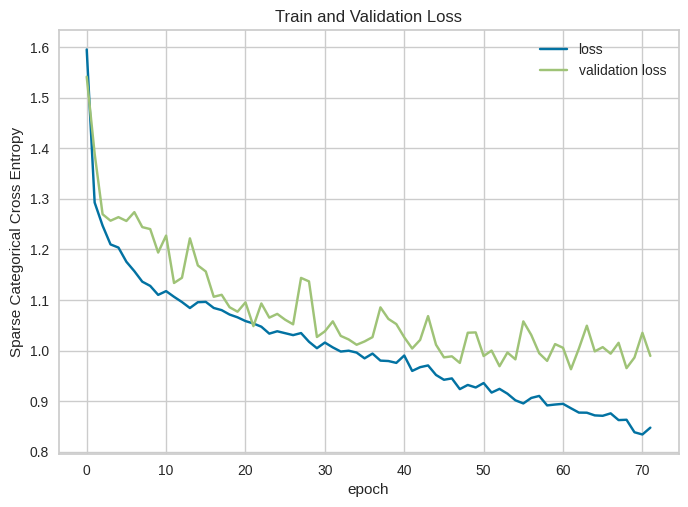

In [83]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

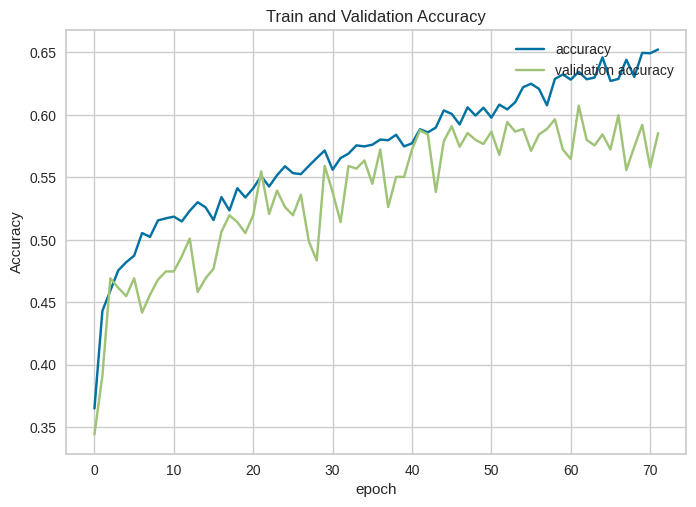

In [84]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

32/32 [==============================] - 0s 2ms/step


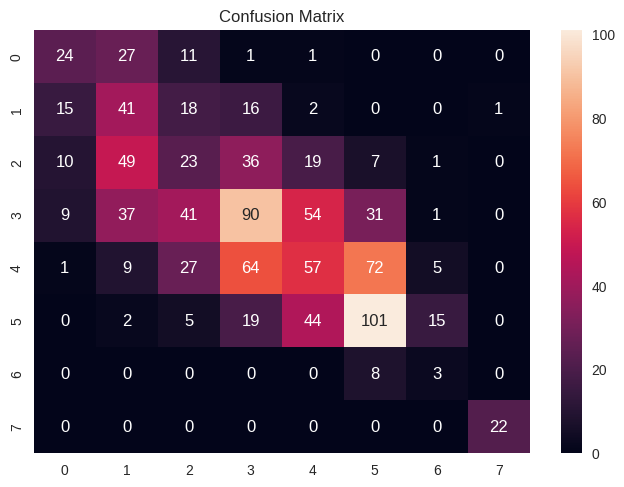

In [85]:
import seaborn as sns
y_pred = model.predict(X_test).argmax(axis=1)
y_pred_prob = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [86]:
print('auc', roc_auc_score(y_test, y_pred_prob, multi_class = 'ovo'))
print('acc', accuracy_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred, average='macro'))
print('recall', recall_score(y_test, y_pred, average = 'macro'))
print('precision', precision_score(y_test, y_pred, average = 'macro'))

auc 0.8400227218084175
acc 0.35426889106967613
f1 0.39580634941904524
recall 0.4218721806009574
precision 0.38715468125559555
